In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [136]:
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [137]:
df=pd.read_csv("C:/Users/deeps/OneDrive/Desktop/car_data.csv")
df.head()

car_id symboling car_name fuel_type aspiration door_number car_body  \
0      1         1     audi       gas        std        four    sedan   
1      2         2     audi       gas        std        four    sedan   
2      3         3     audi       gas        std        four    sedan   
3      4         0     audi       gas        std        four    sedan   
4      5        -1     audi       gas        std        four    sedan   

  drive_wheel eng_loc wheel_base  price  
0         fwd   front       99.6  10342  
1         fwd   front       99.6  10342  
2         fwd   front       99.6  10342  
3         fwd   front       12.2  10342  
4         fwd   front       12.2  10342

In [138]:
df.head()

car_id symboling car_name fuel_type aspiration door_number car_body  \
0      1         1     audi       gas        std        four    sedan   
1      2         2     audi       gas        std        four    sedan   
2      3         3     audi       gas        std        four    sedan   
3      4         0     audi       gas        std        four    sedan   
4      5        -1     audi       gas        std        four    sedan   

  drive_wheel eng_loc wheel_base  price  
0         fwd   front       99.6  10342  
1         fwd   front       99.6  10342  
2         fwd   front       99.6  10342  
3         fwd   front       12.2  10342  
4         fwd   front       12.2  10342

In [139]:
df.columns

Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'eng_loc', 'wheel_base',
       'price'],
      dtype='object')

In [140]:
df.shape

(50, 11)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   car_id       50 non-null     object
 1   symboling    50 non-null     object
 2   car_name     50 non-null     object
 3   fuel_type    50 non-null     object
 4   aspiration   50 non-null     object
 5   door_number  50 non-null     object
 6   car_body     50 non-null     object
 7   drive_wheel  50 non-null     object
 8   eng_loc      50 non-null     object
 9   wheel_base   50 non-null     object
 10  price        50 non-null     int64 
dtypes: int64(1), object(10)
memory usage: 4.4+ KB


In [142]:
df.describe()

price
count     50.00000
mean   41477.24000
std    28521.48956
min    10283.00000
25%    16622.00000
50%    30209.50000
75%    70904.75000
max    97392.00000

# Observations

In [143]:
df.isin(['?']).sum()

car_id         2
symboling      3
car_name       3
fuel_type      5
aspiration     3
door_number    5
car_body       6
drive_wheel    4
eng_loc        3
wheel_base     4
price          0
dtype: int64

In [144]:
df.replace('?',np.nan,inplace=True)
df.isin(['?']).sum()

car_id         0
symboling      0
car_name       0
fuel_type      0
aspiration     0
door_number    0
car_body       0
drive_wheel    0
eng_loc        0
wheel_base     0
price          0
dtype: int64

In [145]:
df.isnull().sum()

car_id         2
symboling      3
car_name       3
fuel_type      5
aspiration     3
door_number    5
car_body       6
drive_wheel    4
eng_loc        3
wheel_base     4
price          0
dtype: int64

In [146]:
#percentage of missing values
round(df.isnull().sum()*100/len(df.index),2)

car_id          4.0
symboling       6.0
car_name        6.0
fuel_type      10.0
aspiration      6.0
door_number    10.0
car_body       12.0
drive_wheel     8.0
eng_loc         6.0
wheel_base      8.0
price           0.0
dtype: float64

In [147]:
df=df.loc[df['car_id'].notnull(),:]
round(df.isnull().sum()*100/len(df.index),2)

car_id          0.00
symboling       6.25
car_name        4.17
fuel_type       8.33
aspiration      6.25
door_number    10.42
car_body       12.50
drive_wheel     8.33
eng_loc         4.17
wheel_base      8.33
price           0.00
dtype: float64

In [148]:
df=df.loc[df['symboling'].notnull(),:]
round(df.isnull().sum()*100/len(df.index),2)

car_id          0.00
symboling       0.00
car_name        4.44
fuel_type       8.89
aspiration      6.67
door_number    11.11
car_body       13.33
drive_wheel     8.89
eng_loc         4.44
wheel_base      8.89
price           0.00
dtype: float64

In [149]:
df=df.loc[df['aspiration'].notnull(),:]
round(df.isnull().sum()*100/len(df.index),2)

car_id          0.00
symboling       0.00
car_name        4.76
fuel_type       9.52
aspiration      0.00
door_number    11.90
car_body       14.29
drive_wheel     9.52
eng_loc         4.76
wheel_base      7.14
price           0.00
dtype: float64

In [150]:
df=df.loc[df['wheel_base'].notnull(),:]
round(df.isnull().sum()*100/len(df.index),2)

car_id          0.00
symboling       0.00
car_name        5.13
fuel_type      10.26
aspiration      0.00
door_number    10.26
car_body       12.82
drive_wheel     7.69
eng_loc         5.13
wheel_base      0.00
price           0.00
dtype: float64

In [151]:
df.shape

(39, 11)

In [152]:
(40-len(df.index))*100/40

2.5

In [153]:
num_att=df.select_dtypes(include=['int64'])
print(num_att.columns)

Index(['price'], dtype='object')


array([[<Axes: title={'center': 'price'}>]], dtype=object)

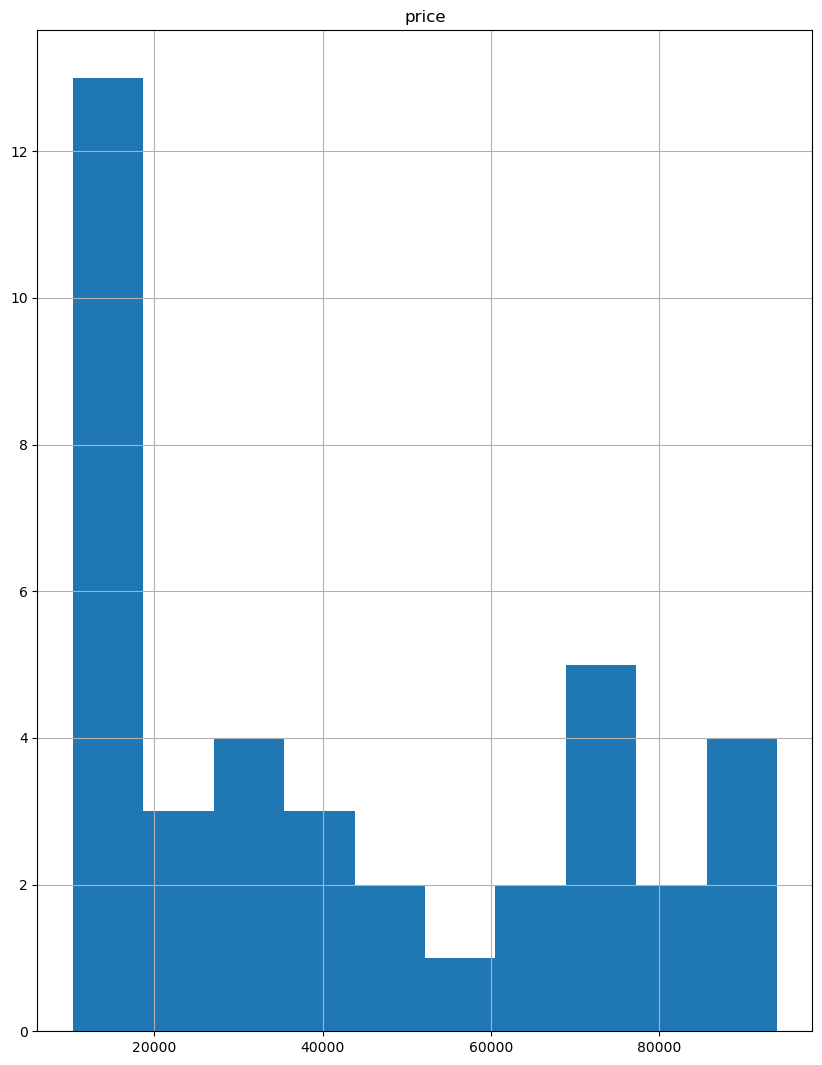

In [154]:
num_att.hist(figsize=(10,13))

In [155]:
cat_att=df.select_dtypes(include=['object'])
print(cat_att.columns)

Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'eng_loc', 'wheel_base'],
      dtype='object')


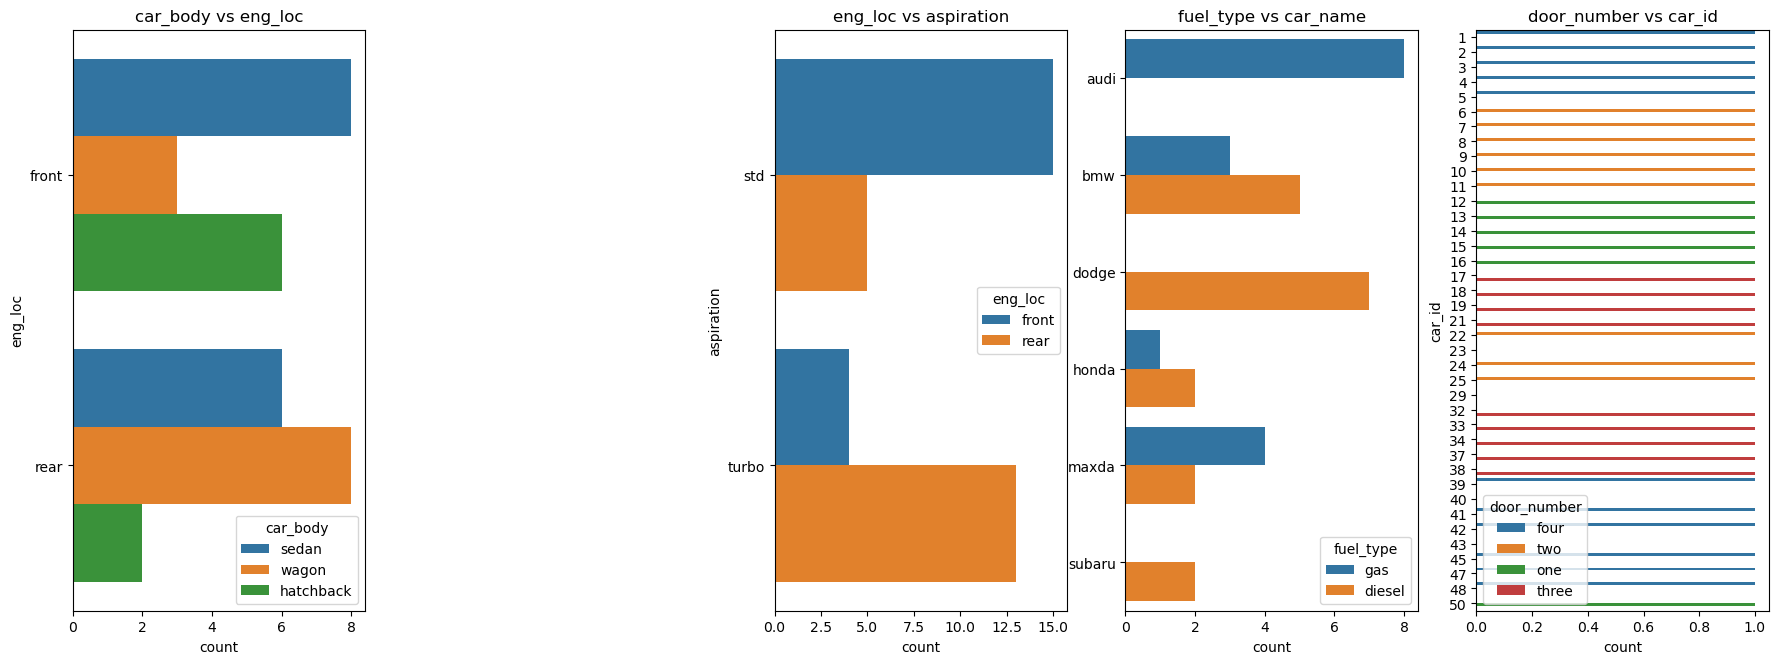

In [156]:
plt.figure(figsize=(40,80))

plt.subplot(999)
sns.countplot(y= 'car_id', hue= 'door_number', data = cat_att)
plt.title('door_number vs car_id')
plt.subplot(998)
sns.countplot(y= 'car_name', hue= 'fuel_type', data = cat_att)
plt.title('fuel_type vs car_name')
plt.subplot(997)
sns.countplot(y= 'aspiration', hue= 'eng_loc', data = cat_att)
plt.title('eng_loc vs aspiration')
plt.subplot(995)
sns.countplot(y= 'eng_loc', hue= 'car_body', data = cat_att)
plt.title('car_body vs eng_loc')
plt.show()

In [157]:
df['price'].value_counts()

price
10342    6
71930    5
12036    4
27490    3
16622    3
39834    3
93982    1
67322    1
51771    1
52709    1
81920    1
52002    1
32929    1
61901    1
19002    1
93743    1
89032    1
79040    1
89309    1
26873    1
19304    1
Name: count, dtype: int64

In [158]:
df.columns

Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'eng_loc', 'wheel_base',
       'price'],
      dtype='object')

In [159]:
df.pivot_table(values=['car_id'],index=['symboling', 'car_name'], aggfunc= 'count')
df.pivot_table

<bound method DataFrame.pivot_table of    car_id symboling car_name fuel_type aspiration door_number   car_body  \
0       1         1     audi       gas        std        four      sedan   
1       2         2     audi       gas        std        four      sedan   
2       3         3     audi       gas        std        four      sedan   
3       4         0     audi       gas        std        four      sedan   
4       5        -1     audi       gas        std        four      sedan   
5       6         2     audi       gas        std         two      sedan   
6       7         5     audi       gas        std         two      sedan   
7       8         3     audi       gas        std         two      sedan   
8       9         5      bmw       gas      turbo         two      wagon   
9      10         2      bmw       gas      turbo         two      wagon   
10     11         8      bmw       gas      turbo         two      wagon   
11     12         3      bmw    diesel      turbo

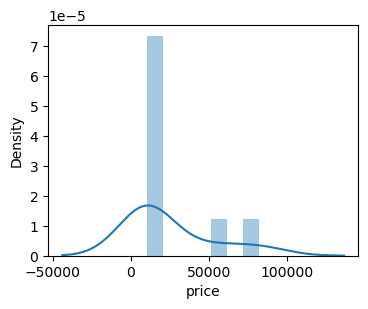

In [160]:
engine_size_price=df.loc[df['car_name']=='audi',['price']]
#Distribution plot
plt.figure(figsize=(4,3))
sns.distplot(engine_size_price['price'])
plt.show()



In [161]:
df.head()

car_id symboling car_name fuel_type aspiration door_number car_body  \
0      1         1     audi       gas        std        four    sedan   
1      2         2     audi       gas        std        four    sedan   
2      3         3     audi       gas        std        four    sedan   
3      4         0     audi       gas        std        four    sedan   
4      5        -1     audi       gas        std        four    sedan   

  drive_wheel eng_loc wheel_base  price  
0         fwd   front       99.6  10342  
1         fwd   front       99.6  10342  
2         fwd   front       99.6  10342  
3         fwd   front       12.2  10342  
4         fwd   front       12.2  10342

<Axes: xlabel='price', ylabel='symboling'>

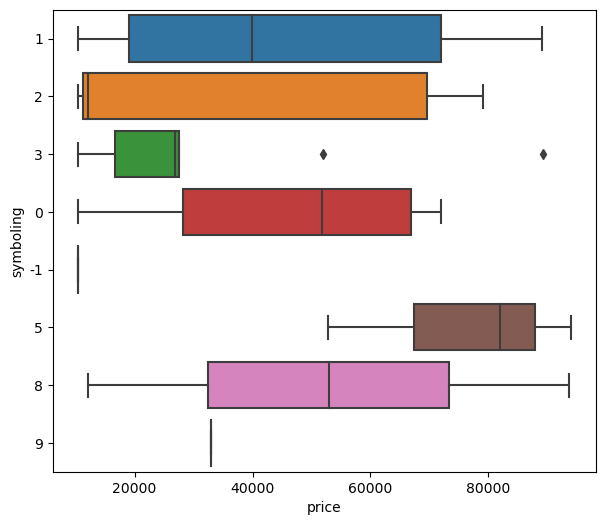

In [162]:
plt.figure(figsize=(7,6))
sns.boxplot(data=df,x='price',y='symboling')

# Data preparation

In [163]:
df.columns

Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'eng_loc', 'wheel_base',
       'price'],
      dtype='object')

In [164]:
print(f"Number of columns before deleting: {df.shape[1]}")
del_cols = ['wheel_base','door_number']
df.drop(labels=del_cols,axis=1,inplace=True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 11
Number of columns after deleting: 9


In [165]:
print("Number of observations before removing:",df.shape)
index_make=df[df['symboling']==0].index
df.drop(labels=index_make,axis=0,inplace=True)
print("Number of observations after removing:",df.shape)

Number of observations before removing: (39, 9)
Number of observations after removing: (39, 9)


In [166]:
categorical=df.select_dtypes(include=['object'])
categorical.head()

car_id symboling car_name fuel_type aspiration car_body drive_wheel eng_loc
0      1         1     audi       gas        std    sedan         fwd   front
1      2         2     audi       gas        std    sedan         fwd   front
2      3         3     audi       gas        std    sedan         fwd   front
3      4         0     audi       gas        std    sedan         fwd   front
4      5        -1     audi       gas        std    sedan         fwd   front

In [167]:
categorical.columns

Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'car_body', 'drive_wheel', 'eng_loc'],
      dtype='object')

In [168]:
numerical=df.select_dtypes(include=['int64','float64'])
numerical.head()

price
0  10342
1  10342
2  10342
3  10342
4  10342

In [169]:
#scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num=pd.DataFrame(scaler.fit_transform(numerical),
                    columns=numerical.columns)
df_num.head()

price
0 -1.097581
1 -1.097581
2 -1.097581
3 -1.097581
4 -1.097581

In [170]:
#Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
df_cat=pd.DataFrame(encoder.fit_transform(categorical),
                    columns=encoder.get_feature_names_out(categorical.columns))
df_cat.head()

car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   car_id_16  car_id_17  car_id_18  car_id_19  ...  fuel_type_nan  \
0        0.0        0.0        0.0        0.0  ...            0.0   
1        0.0        0.0        0.0        0.0  ...            0.0   
2        0.0        0.0        0.0        0.0  ...            0.0   
3        0.0        0.0        0.0        0.0  ...            0.0   
4        0.0        0.0        0.0        0.0  ...            0.0   

   aspiration_turbo  car_body_sedan  car_body_wagon  car_body_nan  \
0               0.0             1.0             0.0           0.0   
1               0.0             1.0             0.0           0.0   
2               0.0             1.0             0.0           0.0   
3               0.0             1.0             0.0           0.0   
4               0.0             1.0             0.0           0.0   

   drive_wheel_fwd  drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  \
0              1.0              0.0              0.0           0.0   
1              1.0              0.0              0.0           0.0   
2              1.0              0.0              0.0           0.0   
3              1.0              0.0              0.0           0.0   
4              1.0              0.0              0.0           0.0   

   eng_loc_nan  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 62 columns]

In [171]:
df=pd.concat([df_num,df_cat],axis=1)
df.head()

price  car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
0 -1.097581        0.0        0.0        0.0        0.0        0.0        0.0   
1 -1.097581        0.0        0.0        0.0        0.0        0.0        0.0   
2 -1.097581        0.0        0.0        0.0        0.0        0.0        0.0   
3 -1.097581        0.0        0.0        0.0        0.0        0.0        0.0   
4 -1.097581        0.0        0.0        0.0        0.0        0.0        0.0   

   car_id_16  car_id_17  car_id_18  ...  fuel_type_nan  aspiration_turbo  \
0        0.0        0.0        0.0  ...            0.0               0.0   
1        0.0        0.0        0.0  ...            0.0               0.0   
2        0.0        0.0        0.0  ...            0.0               0.0   
3        0.0        0.0        0.0  ...            0.0               0.0   
4        0.0        0.0        0.0  ...            0.0               0.0   

   car_body_sedan  car_body_wagon  car_body_nan  drive_wheel_fwd  \
0             1.0             0.0           0.0              1.0   
1             1.0             0.0           0.0              1.0   
2             1.0             0.0           0.0              1.0   
3             1.0             0.0           0.0              1.0   
4             1.0             0.0           0.0              1.0   

   drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  eng_loc_nan  
0              0.0              0.0           0.0          0.0  
1              0.0              0.0           0.0          0.0  
2              0.0              0.0           0.0          0.0  
3              0.0              0.0           0.0          0.0  
4              0.0              0.0           0.0          0.0  

[5 rows x 63 columns]

In [172]:
y=df['price']
x=df.drop('price',axis=1)

In [173]:
df.columns

Index(['price', 'car_id_10', 'car_id_11', 'car_id_12', 'car_id_13',
       'car_id_14', 'car_id_15', 'car_id_16', 'car_id_17', 'car_id_18',
       'car_id_19', 'car_id_2', 'car_id_21', 'car_id_22', 'car_id_23',
       'car_id_24', 'car_id_25', 'car_id_29', 'car_id_3', 'car_id_32',
       'car_id_33', 'car_id_34', 'car_id_37', 'car_id_38', 'car_id_39',
       'car_id_4', 'car_id_40', 'car_id_41', 'car_id_42', 'car_id_43',
       'car_id_45', 'car_id_47', 'car_id_48', 'car_id_5', 'car_id_50',
       'car_id_6', 'car_id_7', 'car_id_8', 'car_id_9', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'symboling_5',
       'symboling_8', 'symboling_9', 'car_name_bmw', 'car_name_dodge',
       'car_name_honda', 'car_name_maxda', 'car_name_subaru', 'car_name_nan',
       'fuel_type_gas', 'fuel_type_nan', 'aspiration_turbo', 'car_body_sedan',
       'car_body_wagon', 'car_body_nan', 'drive_wheel_fwd', 'drive_wheel_rwd',
       'drive_wheel_nan', 'eng_loc_rear', 'eng_loc_nan'],
  

In [174]:
df.shape

(39, 63)

In [175]:
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [176]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(27, 62) (27,)
(12, 62) (12,)


# Training the model

In [177]:
from sklearn.tree import DecisionTreeRegressor
clf_Dec=DecisionTreeRegressor()
clf_Dec.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing

In [178]:
x_test.head()

car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
18        0.0        0.0        0.0        0.0        0.0        0.0   
19        0.0        0.0        0.0        0.0        0.0        0.0   
37        0.0        0.0        0.0        0.0        0.0        0.0   
0         0.0        0.0        0.0        0.0        0.0        0.0   
38        0.0        0.0        0.0        0.0        0.0        0.0   

    car_id_16  car_id_17  car_id_18  car_id_19  ...  fuel_type_nan  \
18        0.0        0.0        0.0        1.0  ...            0.0   
19        0.0        0.0        0.0        0.0  ...            0.0   
37        0.0        0.0        0.0        0.0  ...            1.0   
0         0.0        0.0        0.0        0.0  ...            0.0   
38        0.0        0.0        0.0        0.0  ...            0.0   

    aspiration_turbo  car_body_sedan  car_body_wagon  car_body_nan  \
18               0.0             0.0             0.0           1.0   
19               0.0             0.0             0.0           0.0   
37               1.0             0.0             1.0           0.0   
0                0.0             1.0             0.0           0.0   
38               1.0             0.0             1.0           0.0   

    drive_wheel_fwd  drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  \
18              0.0              0.0              0.0           0.0   
19              0.0              0.0              0.0           0.0   
37              0.0              0.0              0.0           0.0   
0               1.0              0.0              0.0           0.0   
38              0.0              0.0              0.0           0.0   

    eng_loc_nan  
18          0.0  
19          0.0  
37          1.0  
0           0.0  
38          0.0  

[5 rows x 62 columns]

In [179]:
y_test_pred=clf_Dec.predict(x_test)

# Model Evaluation

In [180]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_test_pred)

2.44653364822404

In [181]:
df.columns

Index(['price', 'car_id_10', 'car_id_11', 'car_id_12', 'car_id_13',
       'car_id_14', 'car_id_15', 'car_id_16', 'car_id_17', 'car_id_18',
       'car_id_19', 'car_id_2', 'car_id_21', 'car_id_22', 'car_id_23',
       'car_id_24', 'car_id_25', 'car_id_29', 'car_id_3', 'car_id_32',
       'car_id_33', 'car_id_34', 'car_id_37', 'car_id_38', 'car_id_39',
       'car_id_4', 'car_id_40', 'car_id_41', 'car_id_42', 'car_id_43',
       'car_id_45', 'car_id_47', 'car_id_48', 'car_id_5', 'car_id_50',
       'car_id_6', 'car_id_7', 'car_id_8', 'car_id_9', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'symboling_5',
       'symboling_8', 'symboling_9', 'car_name_bmw', 'car_name_dodge',
       'car_name_honda', 'car_name_maxda', 'car_name_subaru', 'car_name_nan',
       'fuel_type_gas', 'fuel_type_nan', 'aspiration_turbo', 'car_body_sedan',
       'car_body_wagon', 'car_body_nan', 'drive_wheel_fwd', 'drive_wheel_rwd',
       'drive_wheel_nan', 'eng_loc_rear', 'eng_loc_nan'],
  

In [182]:
categorical.columns

Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'car_body', 'drive_wheel', 'eng_loc'],
      dtype='object')

In [183]:
numerical.columns

Index(['price'], dtype='object')

In [184]:
x_train.head()

car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
5         0.0        0.0        0.0        0.0        0.0        0.0   
13        0.0        0.0        0.0        0.0        1.0        0.0   
1         0.0        0.0        0.0        0.0        0.0        0.0   
29        0.0        0.0        0.0        0.0        0.0        0.0   
12        0.0        0.0        0.0        1.0        0.0        0.0   

    car_id_16  car_id_17  car_id_18  car_id_19  ...  fuel_type_nan  \
5         0.0        0.0        0.0        0.0  ...            0.0   
13        0.0        0.0        0.0        0.0  ...            0.0   
1         0.0        0.0        0.0        0.0  ...            0.0   
29        0.0        0.0        0.0        0.0  ...            1.0   
12        0.0        0.0        0.0        0.0  ...            0.0   

    aspiration_turbo  car_body_sedan  car_body_wagon  car_body_nan  \
5                0.0             1.0             0.0           0.0   
13               1.0             0.0             1.0           0.0   
1                0.0             1.0             0.0           0.0   
29               0.0             0.0             0.0           0.0   
12               1.0             0.0             1.0           0.0   

    drive_wheel_fwd  drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  \
5               1.0              0.0              0.0           0.0   
13              0.0              1.0              0.0           1.0   
1               1.0              0.0              0.0           0.0   
29              0.0              0.0              1.0           1.0   
12              0.0              1.0              0.0           1.0   

    eng_loc_nan  
5           0.0  
13          0.0  
1           0.0  
29          0.0  
12          0.0  

[5 rows x 62 columns]

In [185]:
from sklearn.metrics import mean_squared_error
prob=clf_Dec.predict(x_test)
prob=prob[0]
roc_auc=mean_squared_error(y_test,y_test_pred) 
print(roc_auc)

2.44653364822404


In [186]:
x_test.head()

car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
18        0.0        0.0        0.0        0.0        0.0        0.0   
19        0.0        0.0        0.0        0.0        0.0        0.0   
37        0.0        0.0        0.0        0.0        0.0        0.0   
0         0.0        0.0        0.0        0.0        0.0        0.0   
38        0.0        0.0        0.0        0.0        0.0        0.0   

    car_id_16  car_id_17  car_id_18  car_id_19  ...  fuel_type_nan  \
18        0.0        0.0        0.0        1.0  ...            0.0   
19        0.0        0.0        0.0        0.0  ...            0.0   
37        0.0        0.0        0.0        0.0  ...            1.0   
0         0.0        0.0        0.0        0.0  ...            0.0   
38        0.0        0.0        0.0        0.0  ...            0.0   

    aspiration_turbo  car_body_sedan  car_body_wagon  car_body_nan  \
18               0.0             0.0             0.0           1.0   
19               0.0             0.0             0.0           0.0   
37               1.0             0.0             1.0           0.0   
0                0.0             1.0             0.0           0.0   
38               1.0             0.0             1.0           0.0   

    drive_wheel_fwd  drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  \
18              0.0              0.0              0.0           0.0   
19              0.0              0.0              0.0           0.0   
37              0.0              0.0              0.0           0.0   
0               1.0              0.0              0.0           0.0   
38              0.0              0.0              0.0           0.0   

    eng_loc_nan  
18          0.0  
19          0.0  
37          1.0  
0           0.0  
38          0.0  

[5 rows x 62 columns]

# Feature Elimination using RFE

<Axes: >

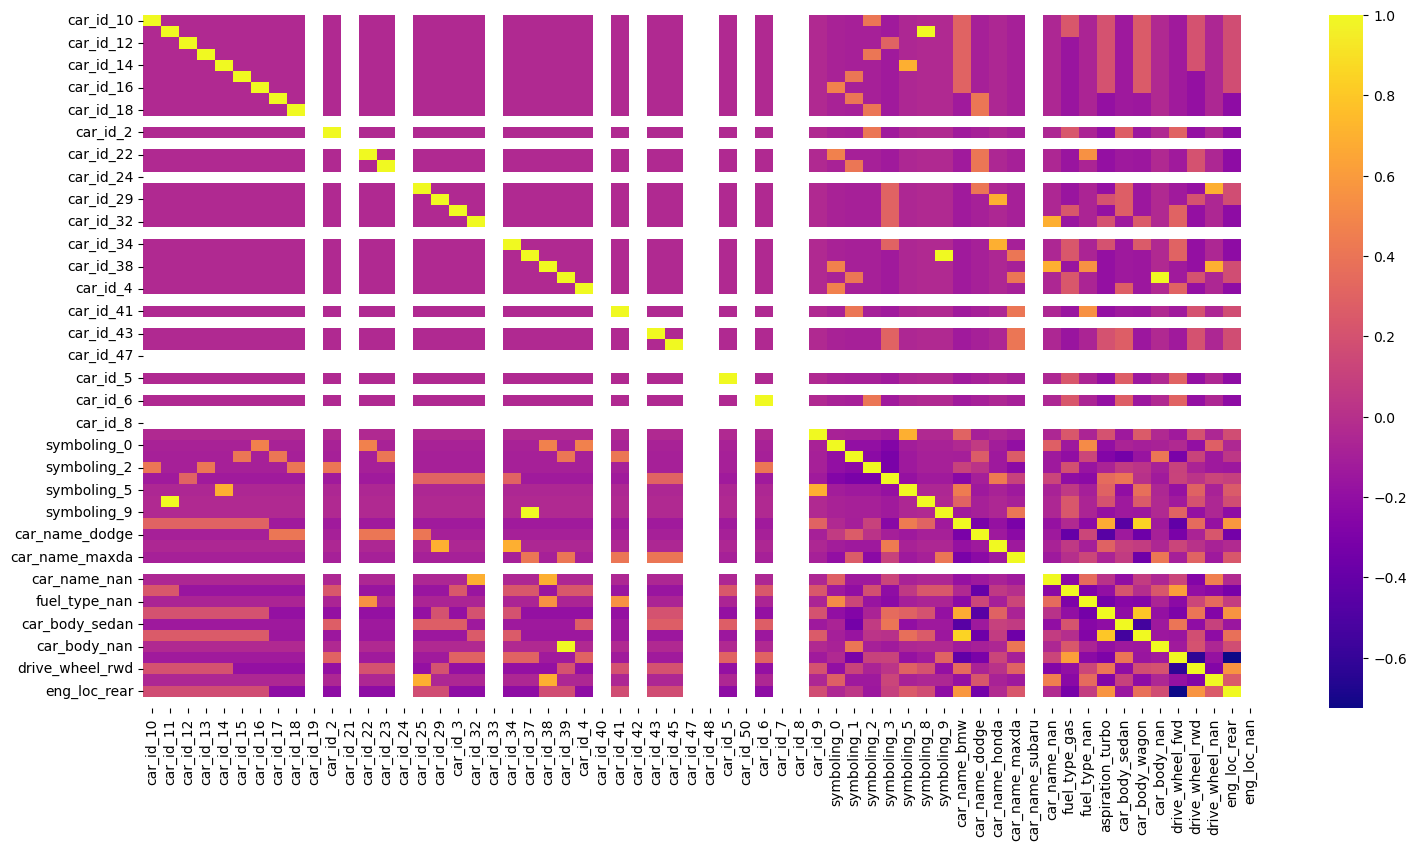

In [187]:
plt.figure(figsize=(18,9))
sns.heatmap(x_train.corr(),cmap="plasma")

In [188]:
x_train.head()

car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
5         0.0        0.0        0.0        0.0        0.0        0.0   
13        0.0        0.0        0.0        0.0        1.0        0.0   
1         0.0        0.0        0.0        0.0        0.0        0.0   
29        0.0        0.0        0.0        0.0        0.0        0.0   
12        0.0        0.0        0.0        1.0        0.0        0.0   

    car_id_16  car_id_17  car_id_18  car_id_19  ...  fuel_type_nan  \
5         0.0        0.0        0.0        0.0  ...            0.0   
13        0.0        0.0        0.0        0.0  ...            0.0   
1         0.0        0.0        0.0        0.0  ...            0.0   
29        0.0        0.0        0.0        0.0  ...            1.0   
12        0.0        0.0        0.0        0.0  ...            0.0   

    aspiration_turbo  car_body_sedan  car_body_wagon  car_body_nan  \
5                0.0             1.0             0.0           0.0   
13               1.0             0.0             1.0           0.0   
1                0.0             1.0             0.0           0.0   
29               0.0             0.0             0.0           0.0   
12               1.0             0.0             1.0           0.0   

    drive_wheel_fwd  drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  \
5               1.0              0.0              0.0           0.0   
13              0.0              1.0              0.0           1.0   
1               1.0              0.0              0.0           0.0   
29              0.0              0.0              1.0           1.0   
12              0.0              1.0              0.0           1.0   

    eng_loc_nan  
5           0.0  
13          0.0  
1           0.0  
29          0.0  
12          0.0  

[5 rows x 62 columns]

In [189]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
clf_Dec_rfe= DecisionTreeRegressor()
rfe=RFE(clf_Dec_rfe)
rfe=rfe.fit(x_train,y_train)


In [190]:
temp_df=pd.DataFrame({'Columns': x_train.columns,'Included': rfe.support_,'Ranking': rfe.ranking_})
temp_df.loc[temp_df.Included==True,:]

Columns  Included  Ranking
3         car_id_13      True        1
4         car_id_14      True        1
5         car_id_15      True        1
6         car_id_16      True        1
7         car_id_17      True        1
8         car_id_18      True        1
9         car_id_19      True        1
10         car_id_2      True        1
11        car_id_21      True        1
13        car_id_23      True        1
14        car_id_24      True        1
15        car_id_25      True        1
16        car_id_29      True        1
28        car_id_43      True        1
38      symboling_0      True        1
41      symboling_3      True        1
42      symboling_5      True        1
43      symboling_8      True        1
44      symboling_9      True        1
45     car_name_bmw      True        1
46   car_name_dodge      True        1
47   car_name_honda      True        1
48   car_name_maxda      True        1
49  car_name_subaru      True        1
51    fuel_type_gas      True        1
52    fuel_type_nan      True        1
54   car_body_sedan      True        1
55   car_body_wagon      True        1
56     car_body_nan      True        1
57  drive_wheel_fwd      True        1
58  drive_wheel_rwd      True        1

In [191]:
x_train_cols=list(x_train.columns[rfe.support_])

In [192]:
len(x_train_cols)

31

In [193]:
x_train_rfe=x_train[x_train_cols]
x_train_rfe.shape

(27, 31)

<Axes: >

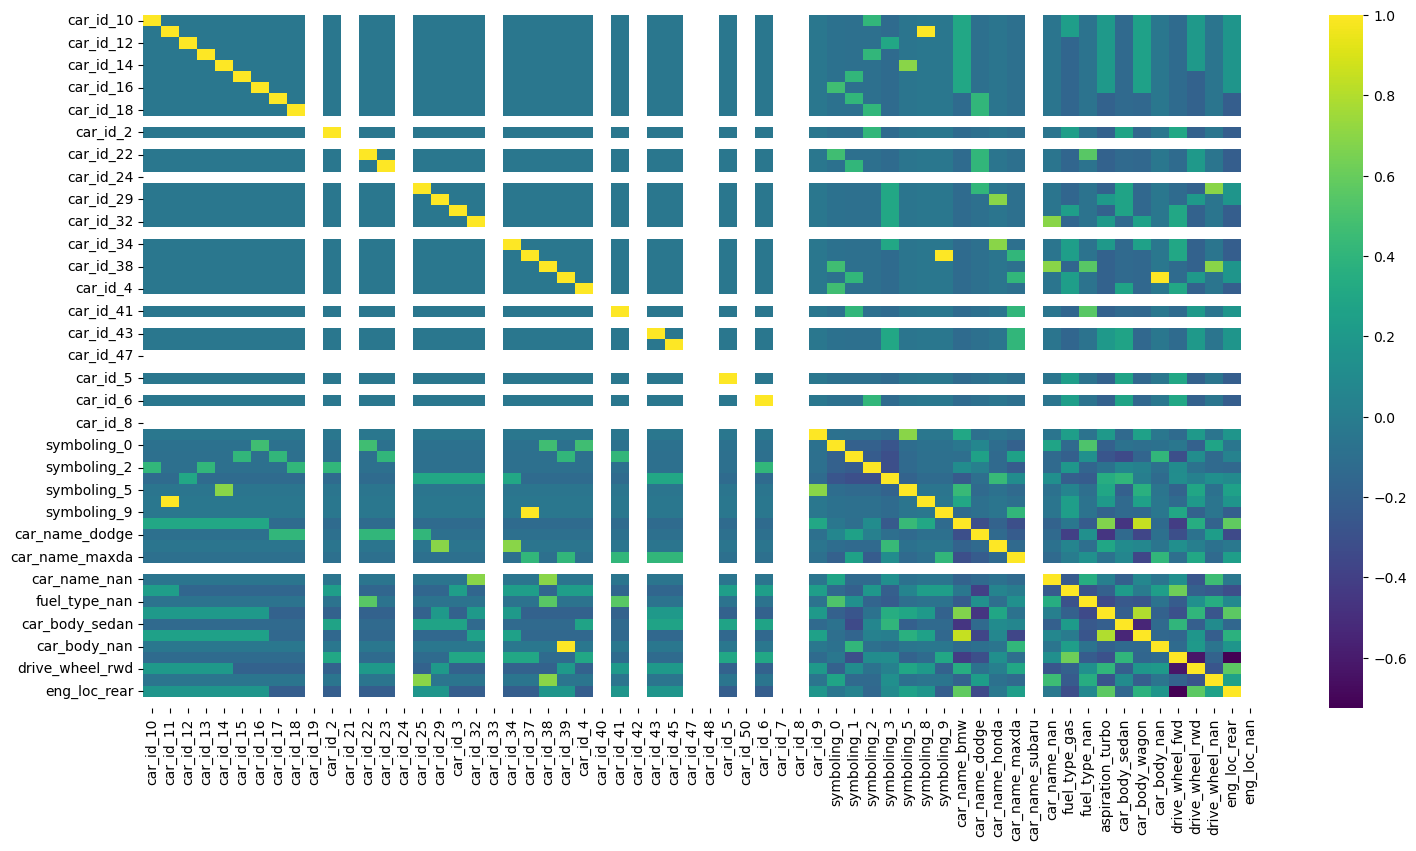

In [196]:
plt.figure(figsize=(18,9))
sns.heatmap(x_train.corr(),cmap="viridis")

In [197]:
clf_Dec_rfe.fit(x_train_rfe,y_train)

DecisionTreeRegressor()

In [198]:
x_test_rfe=x_test[x_train_cols]

In [199]:
y_test_pred_rfe=clf_Dec_rfe.predict(x_test_rfe)

In [200]:
metrics.mean_squared_error(y_test,y_test_pred_rfe)

1.7846539536865127

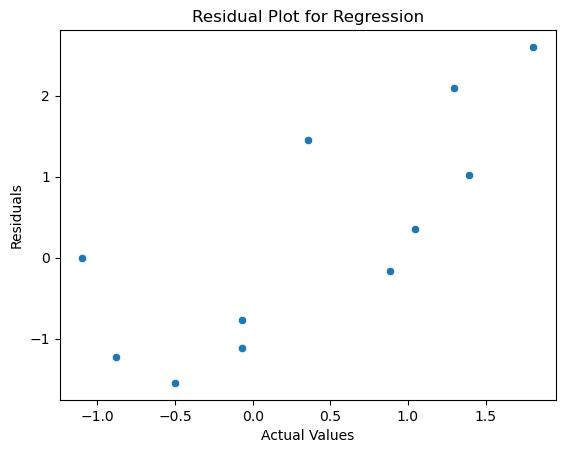

In [201]:
residuals=y_test-y_test_pred_rfe
sns.scatterplot(x=y_test,y=residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Regression')
plt.show()

In [202]:
mse=metrics.mean_squared_error(y_test,y_test_pred_rfe)
print(f'Mean Squared Error:{mse}')

Mean Squared Error:1.7846539536865127


In [203]:
y_test_pred_rfe=clf_Dec.predict(x_test)
mse=metrics.mean_squared_error(y_test,y_test_pred_rfe)
print(f'Mean Squared Error:{mse}')
                               

Mean Squared Error:2.44653364822404


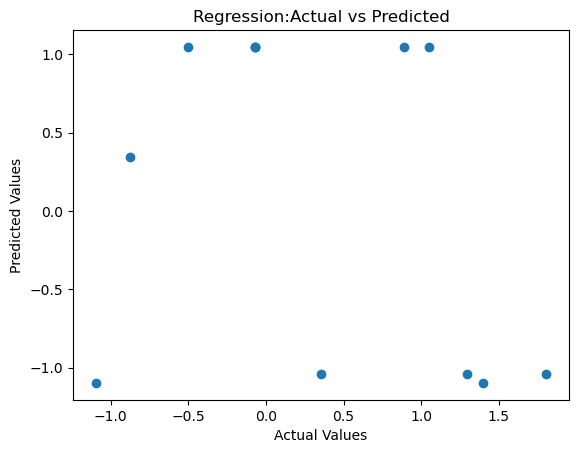

In [205]:
plt.scatter(y_test,y_test_pred_rfe)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression:Actual vs Predicted')
plt.show()

# Principal Component Analysis

In [206]:
x_train.shape

(27, 62)

In [207]:
x_train.head()

car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
5         0.0        0.0        0.0        0.0        0.0        0.0   
13        0.0        0.0        0.0        0.0        1.0        0.0   
1         0.0        0.0        0.0        0.0        0.0        0.0   
29        0.0        0.0        0.0        0.0        0.0        0.0   
12        0.0        0.0        0.0        1.0        0.0        0.0   

    car_id_16  car_id_17  car_id_18  car_id_19  ...  fuel_type_nan  \
5         0.0        0.0        0.0        0.0  ...            0.0   
13        0.0        0.0        0.0        0.0  ...            0.0   
1         0.0        0.0        0.0        0.0  ...            0.0   
29        0.0        0.0        0.0        0.0  ...            1.0   
12        0.0        0.0        0.0        0.0  ...            0.0   

    aspiration_turbo  car_body_sedan  car_body_wagon  car_body_nan  \
5                0.0             1.0             0.0           0.0   
13               1.0             0.0             1.0           0.0   
1                0.0             1.0             0.0           0.0   
29               0.0             0.0             0.0           0.0   
12               1.0             0.0             1.0           0.0   

    drive_wheel_fwd  drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  \
5               1.0              0.0              0.0           0.0   
13              0.0              1.0              0.0           1.0   
1               1.0              0.0              0.0           0.0   
29              0.0              0.0              1.0           1.0   
12              0.0              1.0              0.0           1.0   

    eng_loc_nan  
5           0.0  
13          0.0  
1           0.0  
29          0.0  
12          0.0  

[5 rows x 62 columns]

In [208]:
from sklearn.decomposition import PCA
pca=PCA(random_state=0)

In [209]:
pca.fit(x_train)

PCA(random_state=0)

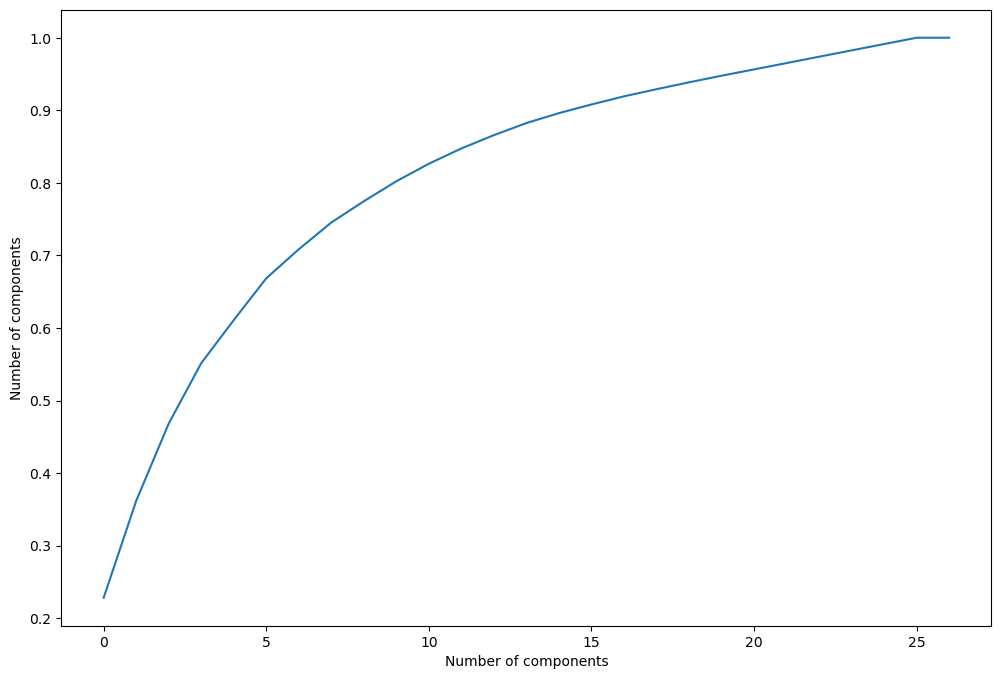

In [210]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Number of components')
plt.show()

In [211]:
from sklearn.decomposition import PCA
pca_final=PCA(n_components=15,random_state=0)
x_train_pca=pca_final.fit_transform(x_train)

In [212]:
x_train_pca.shape

(27, 15)

In [213]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22825312, 0.36176941, 0.46825237, 0.55149548, 0.61084142,
       0.66844978, 0.70844744, 0.74532542, 0.77459671, 0.80217909,
       0.82632653, 0.8474183 , 0.86571918, 0.88241002, 0.8960713 ,
       0.90800119, 0.91919333, 0.92904754, 0.93852082, 0.94760673,
       0.95633894, 0.96507115, 0.97380336, 0.98253558, 0.99126779,
       1.        , 1.        ])

In [214]:
corrmat=np.corrcoef(x_train_pca.T)

<Axes: >

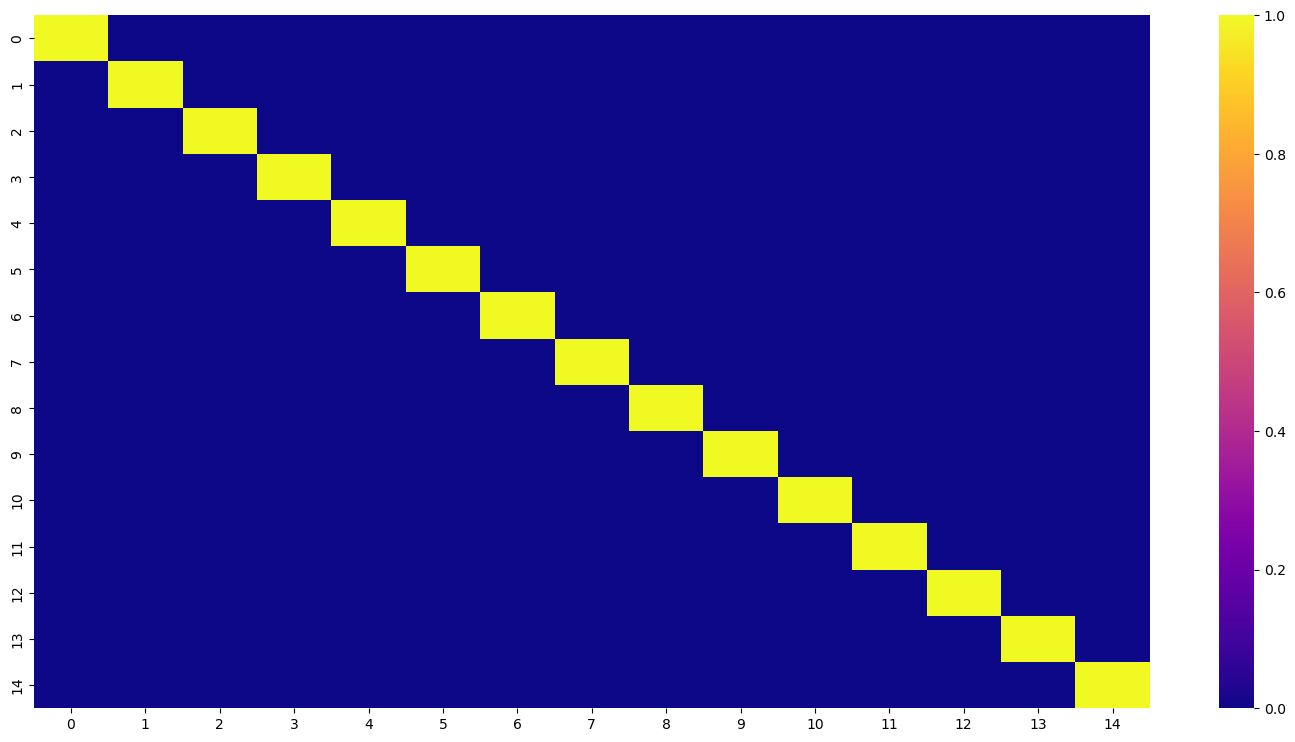

In [215]:
plt.figure(figsize=(18,9))
sns.heatmap(corrmat,cmap="plasma")

In [216]:
x_test.head()

car_id_10  car_id_11  car_id_12  car_id_13  car_id_14  car_id_15  \
18        0.0        0.0        0.0        0.0        0.0        0.0   
19        0.0        0.0        0.0        0.0        0.0        0.0   
37        0.0        0.0        0.0        0.0        0.0        0.0   
0         0.0        0.0        0.0        0.0        0.0        0.0   
38        0.0        0.0        0.0        0.0        0.0        0.0   

    car_id_16  car_id_17  car_id_18  car_id_19  ...  fuel_type_nan  \
18        0.0        0.0        0.0        1.0  ...            0.0   
19        0.0        0.0        0.0        0.0  ...            0.0   
37        0.0        0.0        0.0        0.0  ...            1.0   
0         0.0        0.0        0.0        0.0  ...            0.0   
38        0.0        0.0        0.0        0.0  ...            0.0   

    aspiration_turbo  car_body_sedan  car_body_wagon  car_body_nan  \
18               0.0             0.0             0.0           1.0   
19               0.0             0.0             0.0           0.0   
37               1.0             0.0             1.0           0.0   
0                0.0             1.0             0.0           0.0   
38               1.0             0.0             1.0           0.0   

    drive_wheel_fwd  drive_wheel_rwd  drive_wheel_nan  eng_loc_rear  \
18              0.0              0.0              0.0           0.0   
19              0.0              0.0              0.0           0.0   
37              0.0              0.0              0.0           0.0   
0               1.0              0.0              0.0           0.0   
38              0.0              0.0              0.0           0.0   

    eng_loc_nan  
18          0.0  
19          0.0  
37          1.0  
0           0.0  
38          0.0  

[5 rows x 62 columns]

In [228]:
x_test_pca=pca_final.transform(x_test)

In [229]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [230]:
clf_linear_regression=LinearRegression()
clf_Dec_pca=DecisionTreeRegressor()
clf_svm_pca=SVR()

In [231]:
regressors=['LinearRegression','DecisionTreeRegressor','SVR']

In [232]:
models={clf_Dec_pca:'DecisionTreeRegressor',
       clf_linear_regression:'LogisticRegression',
       clf_svm_pca:'SVR'}

In [239]:
def train(algo,name,x_train_pca,y_train,x_test_pca,y_test):
    algo.fit(x_train_pca,y_train)
    y_test_pred_pca=algo.predict(x_test_pca)
    return y_test_pred_pca
def performance(algo,name,x_test,y_test,y_test_pred_pca):
    #Mean Squared Error
    mse=metrics.mean_squared_error(y_test,y_test_pred_pca)
    print('Mean Squared Error for',name,':',mse)
    #Mean Absolute Error
    mae=mean_absolute_error(y_test,y_test_pred_pca)
    print('Mean Absolute Error for',name,':',mae)
    #R-Squared
    r2=r2_score(y_test,y_test_pred_pca)
    print('R-Squared for',name,':',r2)
    #Scatter plot for actual vs predicted values
    plt.scatter(y_test,y_test_pred_pca)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression:Actual vs Predicted Values')
    plt.show()
    return r2

def main(models):
    mse_values=[]
    for algo,name in models.items():
        print('#'*40,name,'#'*40)
        y_test_pred_pca=train(algo,name,x_train_pca,y_train,x_test_pca,y_test)
        mse_pca=mean_squared_error(y_test,y_test_pred_pca)
        mse_values.append(mse_pca)
        return mse_values
    

In [240]:
%%time
mse_values=main(models)

######################################## DecisionTreeRegressor ########################################
CPU times: total: 0 ns
Wall time: 4.36 ms


In [241]:
model_comp_df=pd.DataFrame({'MSE':mse_values},index=models.keys())
model_comp_df

MSE
DecisionTreeRegressor()  1.381882
LinearRegression()       1.381882
SVR()                    1.381882